<a href="https://colab.research.google.com/github/MaxSMCON/MaxSMCON/blob/main/Matplotlib_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020-7-7

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [ ]:
mpl.__version__

'3.2.2'

# Load toy data set

California housing prices: https://www.kaggle.com/camnugent/california-housing-prices

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [ ]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG",
                                    dest_path="./housing.csv",
                                    unzip=False)
df_housing = pd.read_csv("housing.csv")
df_housing["population_category"] = pd.cut(df_housing["population"], bins=[-np.inf,500,1000,np.inf], labels=["low","medium","high"])
df_housing["median_income_category"] = pd.cut(df_housing["median_income"], bins=[-np.inf,1,4,7,10,14,np.inf], labels=["poor people","working class","lower-middle class","middle class","upper-middle class","rich people"])
df_housing["housing_median_age_category"] = pd.cut(df_housing["housing_median_age"], bins=[-np.inf,15,np.inf], labels=["new","old"])
df_housing.dropna(inplace=True)
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_category,median_income_category,housing_median_age_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,low,middle class,old
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,high,middle class,old
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,low,middle class,old
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,medium,lower-middle class,old
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,medium,working class,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,medium,working class,old
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,low,working class,old
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,high,working class,old
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,medium,working class,old


# Plotting with pandas 🐼

## Histogram

Show multiple histograms (for a dataframe)

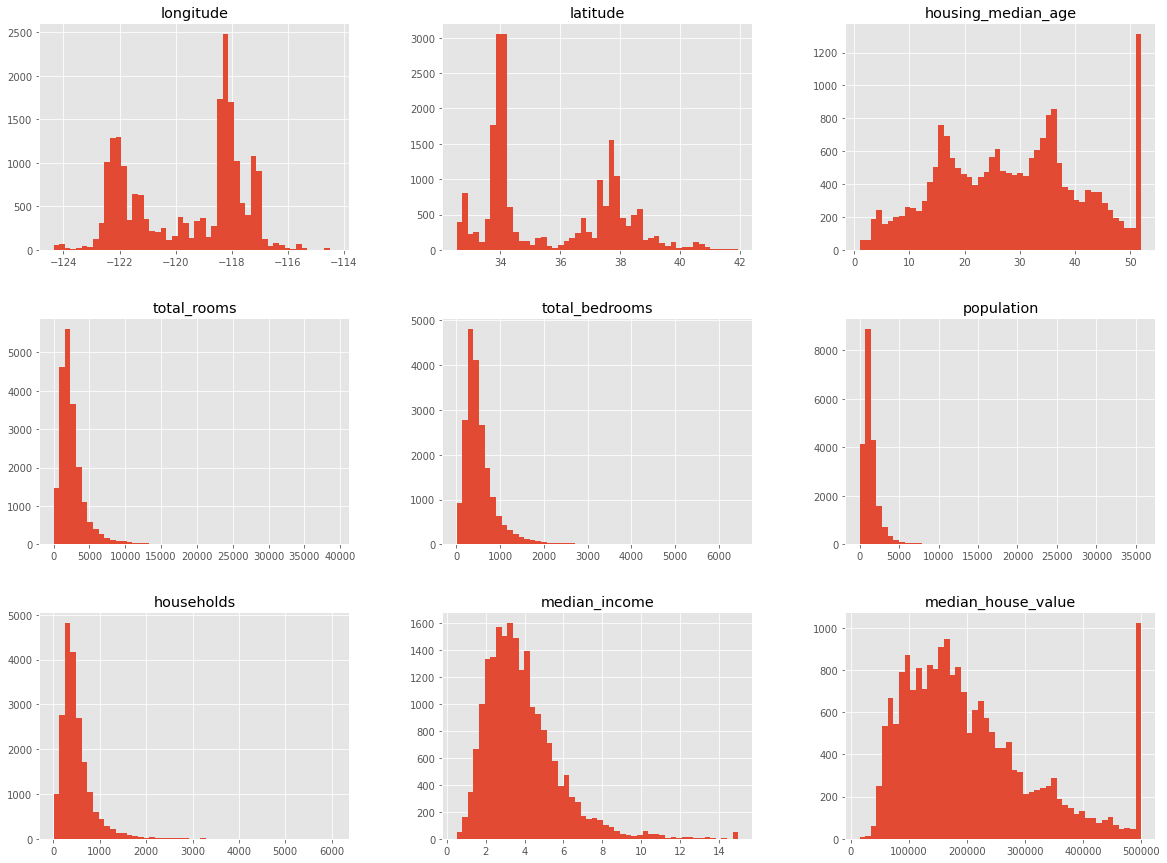

In [ ]:
df_housing.hist(bins=50, figsize=(20,15));

Show single histogram (for a series) and save figure to file

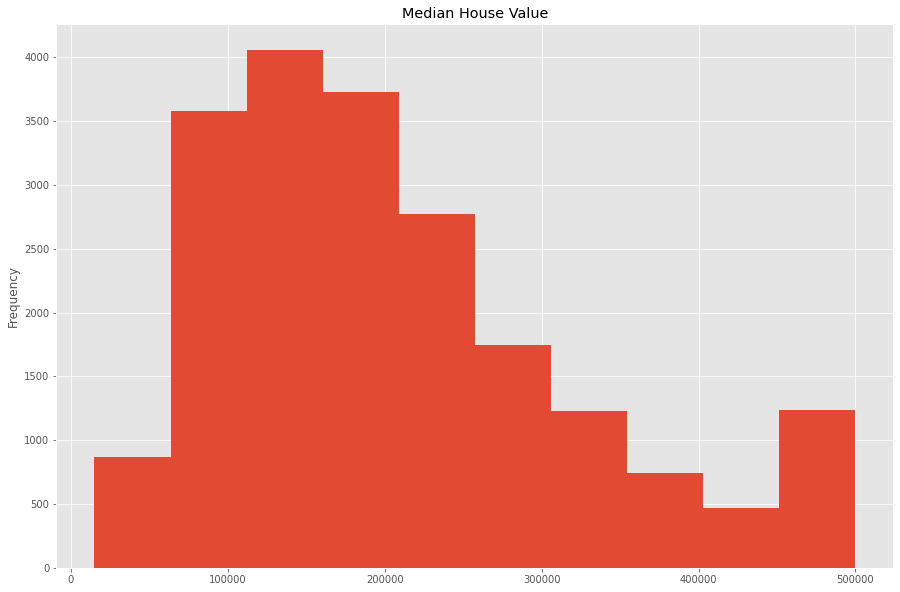

In [ ]:
# df_housing["median_house_value"].hist(figsize=(15,10))
df_housing["median_house_value"].plot(kind="hist", figsize=(15,10), title="Median House Value")
plt.gcf().savefig("pandas histogram.png")

Stacked histogram

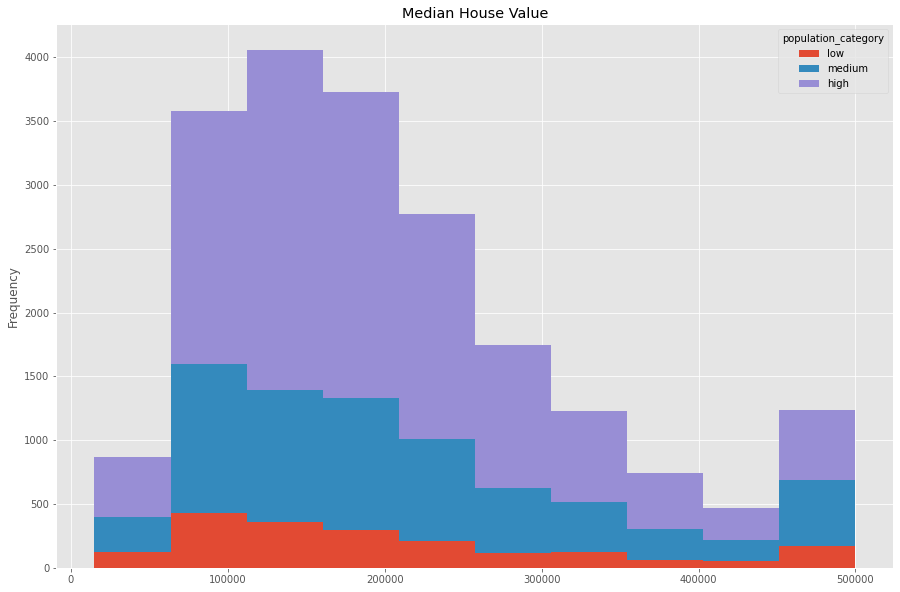

In [ ]:
df_housing.pivot(columns="population_category")["median_house_value"].plot(kind="hist", stacked=True, figsize=(15,10), title="Median House Value");

## Bar plot

In [ ]:
df_groupby = df_housing.groupby("ocean_proximity")[["median_house_value"]].median().sort_values("median_house_value")
df_groupby

,median_house_value
ocean_proximity,
INLAND,108700.0
<1H OCEAN,215000.0
NEAR OCEAN,228750.0
NEAR BAY,233800.0
ISLAND,414700.0


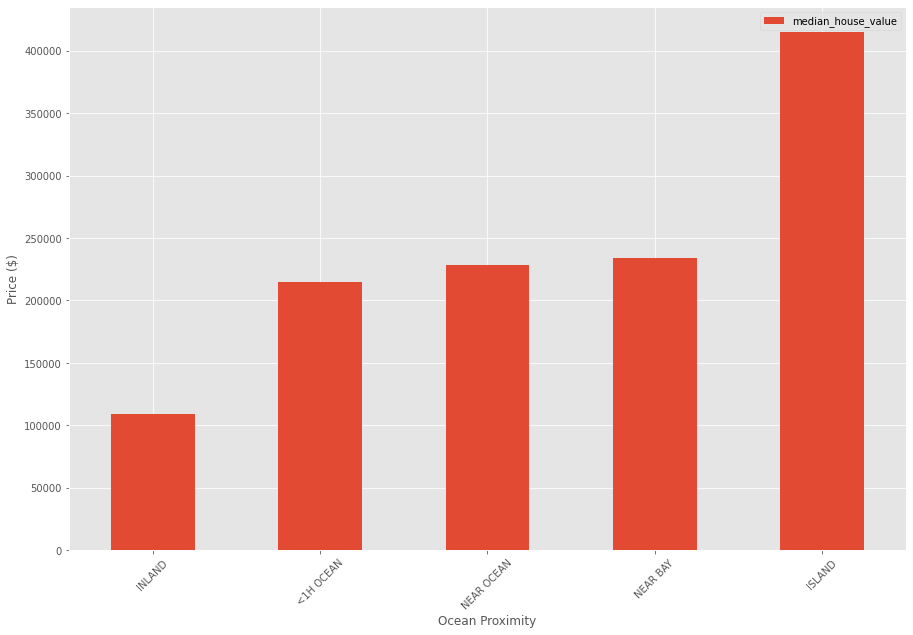

In [ ]:
ax = df_groupby.plot(kind='bar', rot=45, figsize=(15, 10)); #rot parameter rotates the labels
ax.set_ylabel("Price ($)");
ax.set_xlabel("Ocean Proximity");

Stacked bar plot

In [ ]:
df_crosstab = pd.crosstab(df_housing["ocean_proximity"], df_housing["population_category"])
df_crosstab

population_category,low,medium,high
ocean_proximity,,,
<1H OCEAN,581,2533,5920
INLAND,854,1938,3704
ISLAND,2,2,1
NEAR BAY,266,807,1197
NEAR OCEAN,250,842,1536


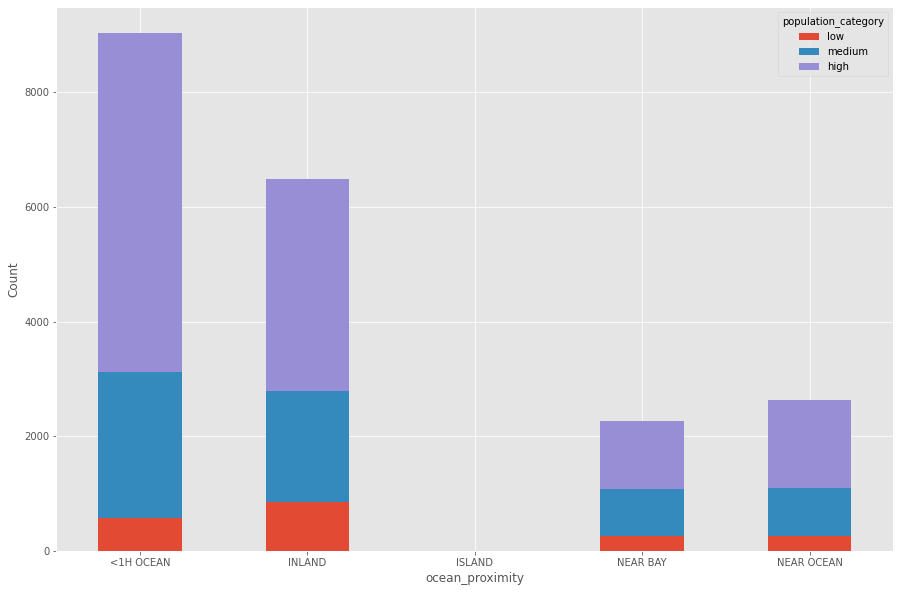

In [ ]:
ax = df_crosstab.plot(kind='bar', stacked=True, rot=0, figsize=(15, 10));
ax.set_ylabel("Count");

Grouped bar plot

In [ ]:
df_groupby_room = df_housing.groupby("ocean_proximity")[["total_rooms", "total_bedrooms"]].median().reset_index()
df_groupby_room

,ocean_proximity,total_rooms,total_bedrooms
0,<1H OCEAN,2107.0,438.0
1,INLAND,2136.0,423.0
2,ISLAND,1675.0,512.0
3,NEAR BAY,2082.5,423.0
4,NEAR OCEAN,2197.0,464.0


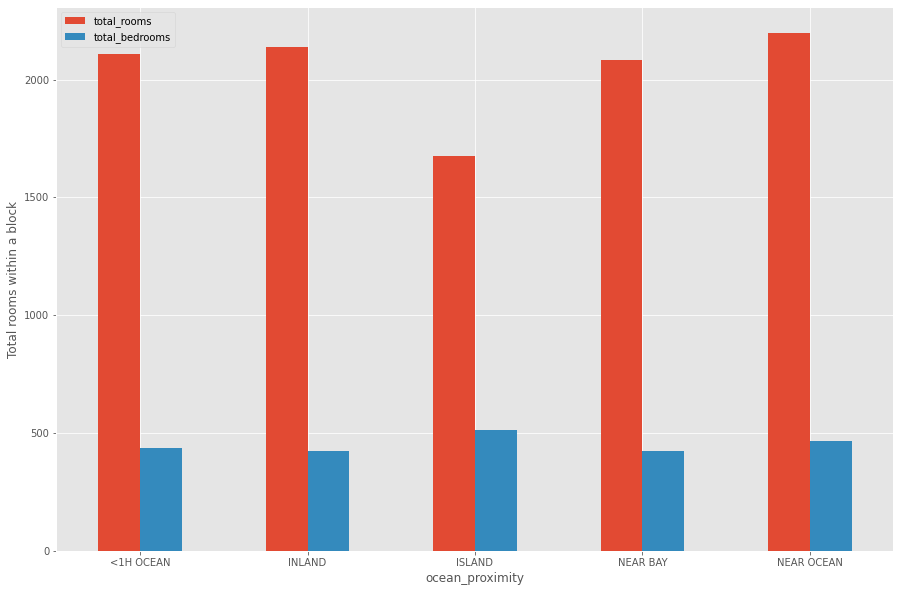

In [ ]:
ax = df_groupby_room.plot(kind="bar", x="ocean_proximity", y=["total_rooms", "total_bedrooms"], rot=0, figsize=(15, 10));
ax.set_ylabel("Total rooms within a block");

## Scatter plot

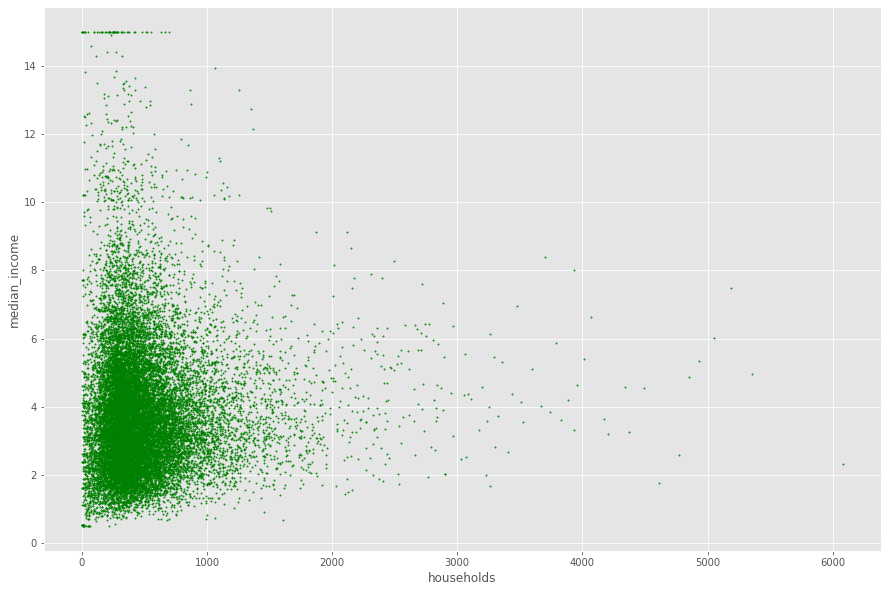

In [ ]:
df_housing.plot(kind="scatter", x="households", y="median_income", figsize=(15,10), s=2, alpha=0.8, c="green");

(0.0, 6.0)

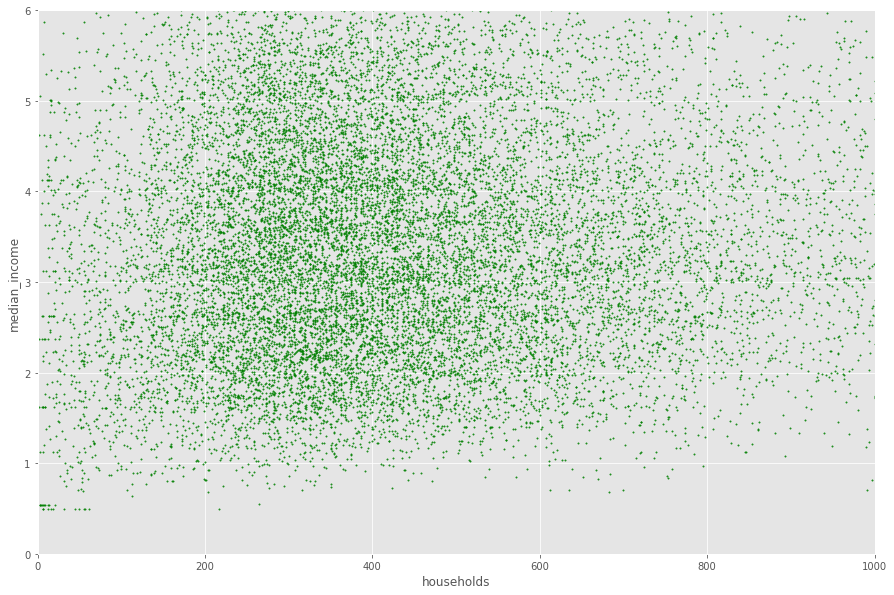

In [ ]:
ax = df_housing.plot(kind="scatter", x="households", y="median_income", figsize=(15,10), s=2, alpha=0.8, c="green");
ax.set_xlim((0, 1000))
ax.set_ylim((0, 6))

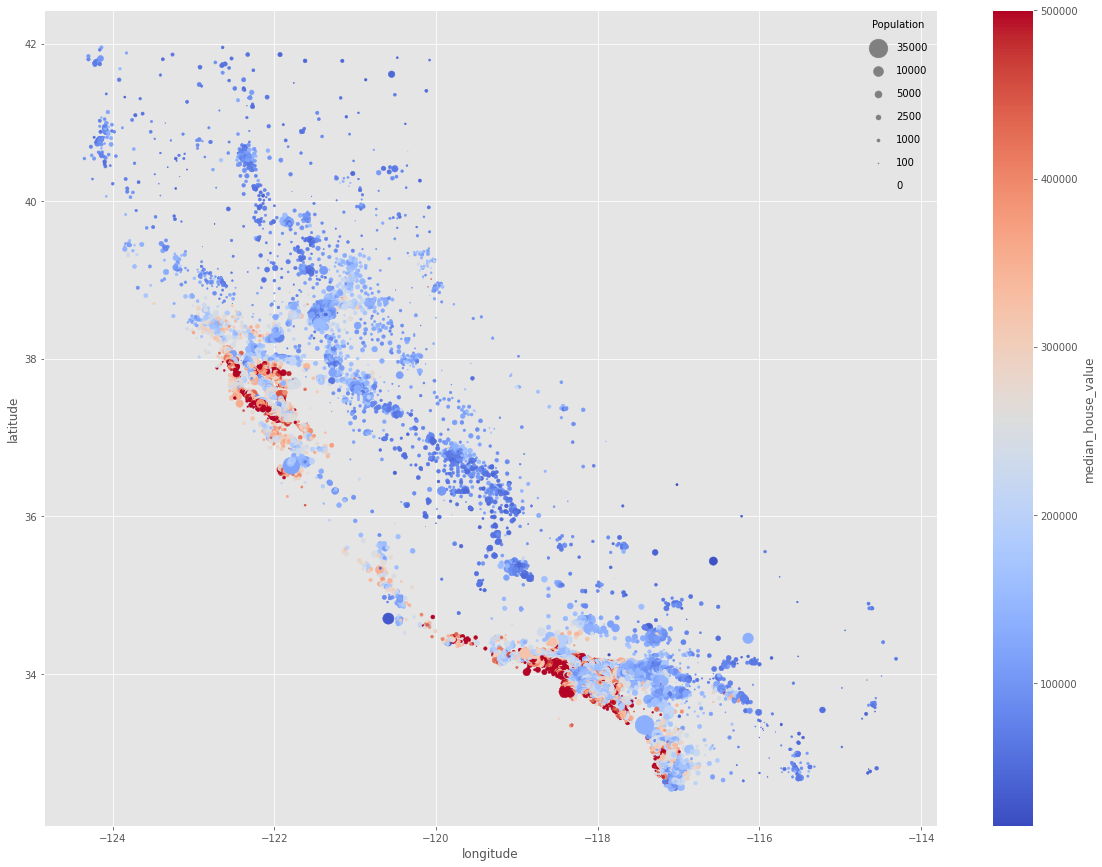

In [ ]:
#bubble plot
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1,
    s=df_housing["population"]/100, figsize=(20,15), #label="population", 
    c="median_house_value", cmap="coolwarm", colorbar=True,
    sharex=False)
for area in [35000,10000,5000,2500,1000,100,0]:
    plt.scatter([], [], c="gray", alpha=1, s=area/100, label=str(area))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1.3, title="Population");

## Line plot

In [ ]:
df_ranked_value = df_housing["median_income"].sort_values().reset_index(drop=True)*10000
df_ranked_value

0          4999.0
1          4999.0
2          4999.0
3          4999.0
4          4999.0
           ...   
20428    150001.0
20429    150001.0
20430    150001.0
20431    150001.0
20432    150001.0
Name: median_income, Length: 20433, dtype: float64

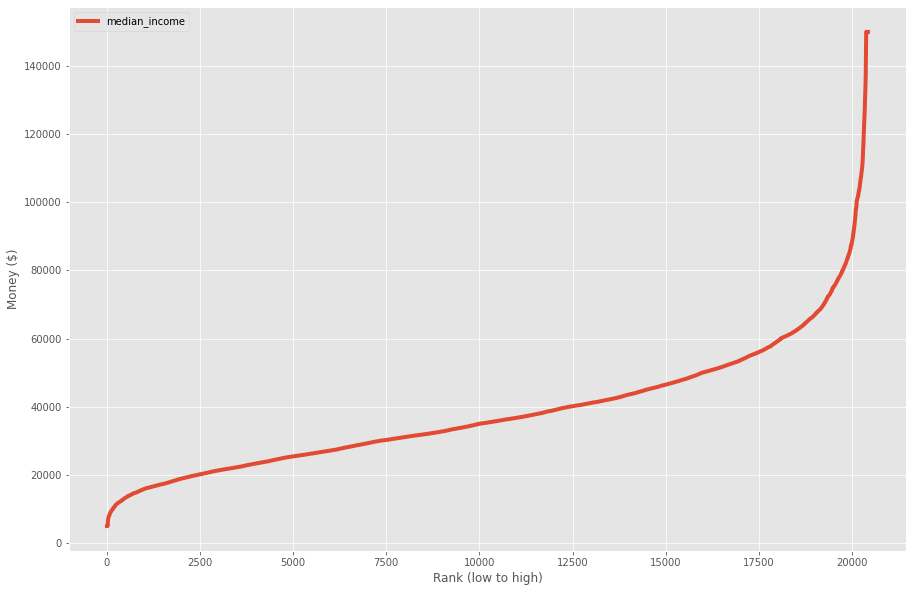

In [ ]:
ax = df_ranked_value.plot(figsize=(15,10), linewidth=4)
ax.set_ylabel("Money ($)");
ax.set_xlabel("Rank (low to high)");
plt.legend(loc="upper left");

Two plots on the same axis

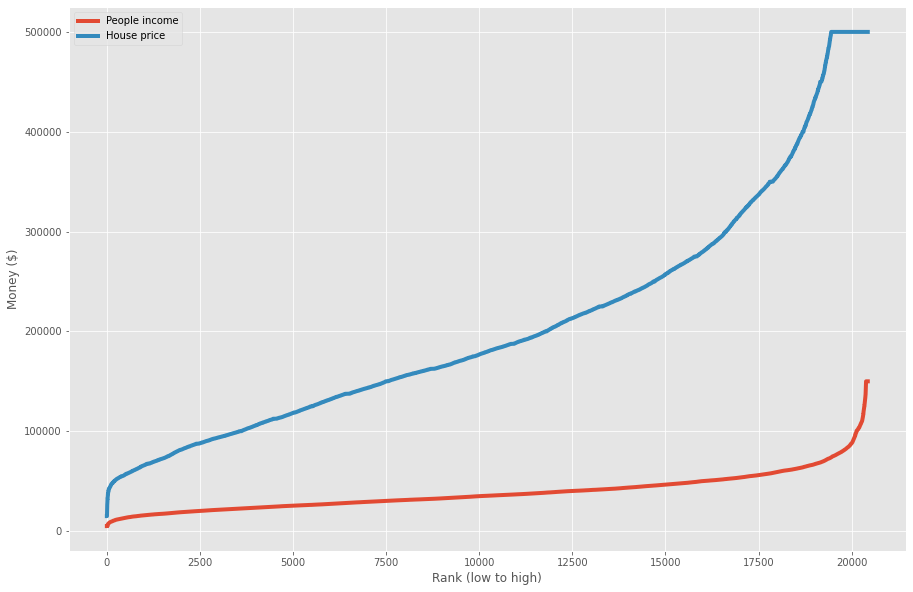

In [ ]:
ax = (df_housing["median_income"].sort_values().reset_index(drop=True)*10000).plot(figsize=(15,10), linewidth=4, label="People income");
df_housing["median_house_value"].sort_values().reset_index(drop=True).plot(ax=ax, linewidth=4, label="House price");
ax.set_ylabel("Money ($)");
ax.set_xlabel("Rank (low to high)");
plt.legend(loc="upper left");

# Plotting with matplotlib

## Histogram

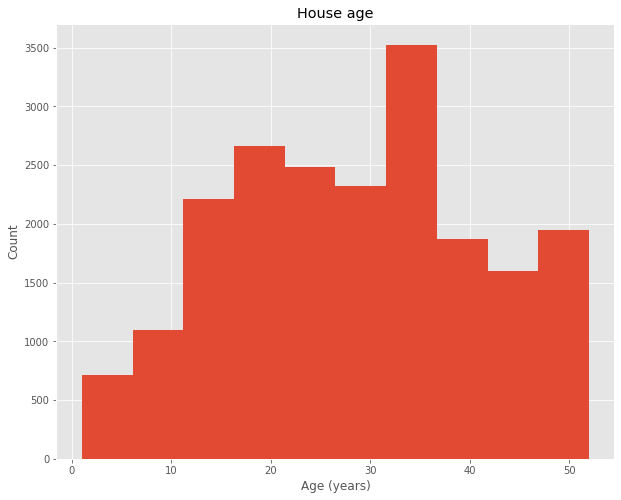

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df_housing["housing_median_age"])
plt.title("House age")
plt.ylabel("Count")
plt.xlabel("Age (years)")
plt.savefig("matplotlib histogram.png", dpi=180)

## Scatter plot

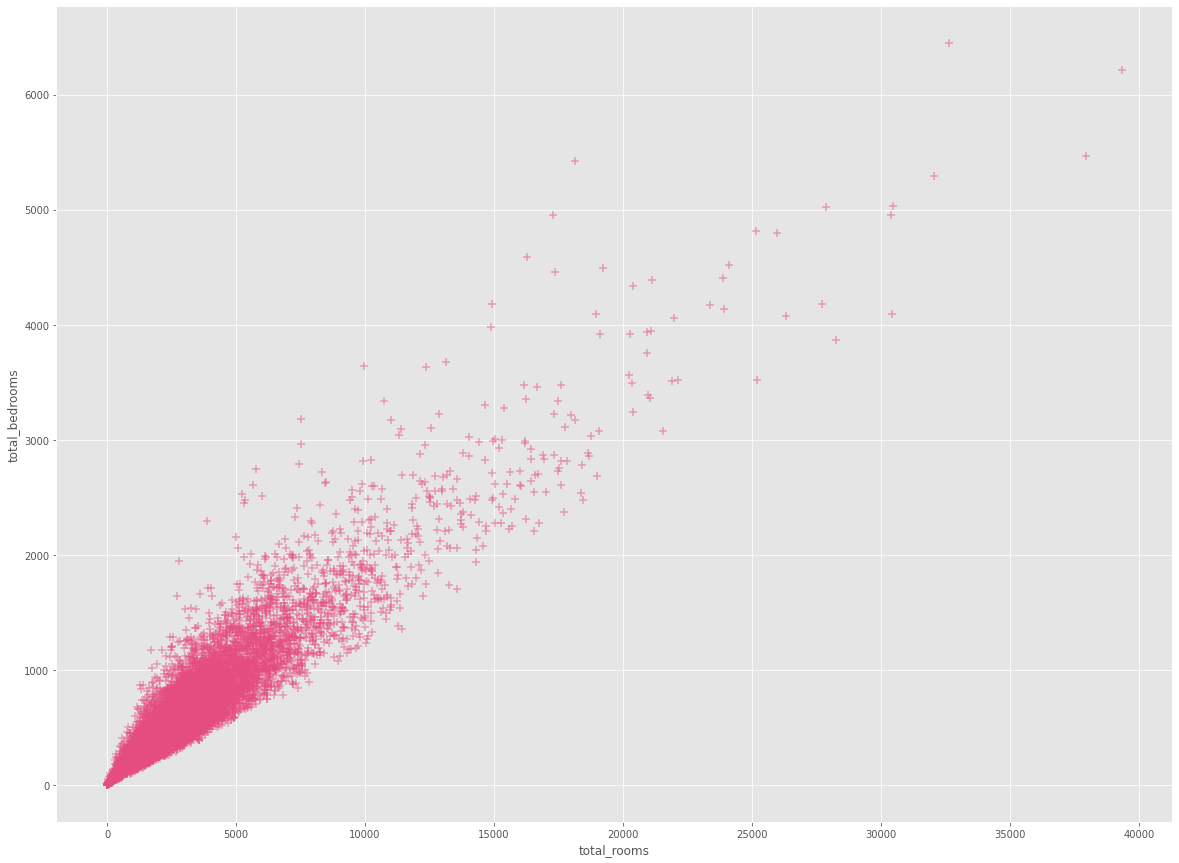

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(
    x=df_housing["total_rooms"], y=df_housing["total_bedrooms"], 
    s=50, 
    color=(0.9,0.3,0.5), 
    alpha=0.5, 
    marker="+",
    )
plt.xlabel("total_rooms"); plt.ylabel("total_bedrooms");

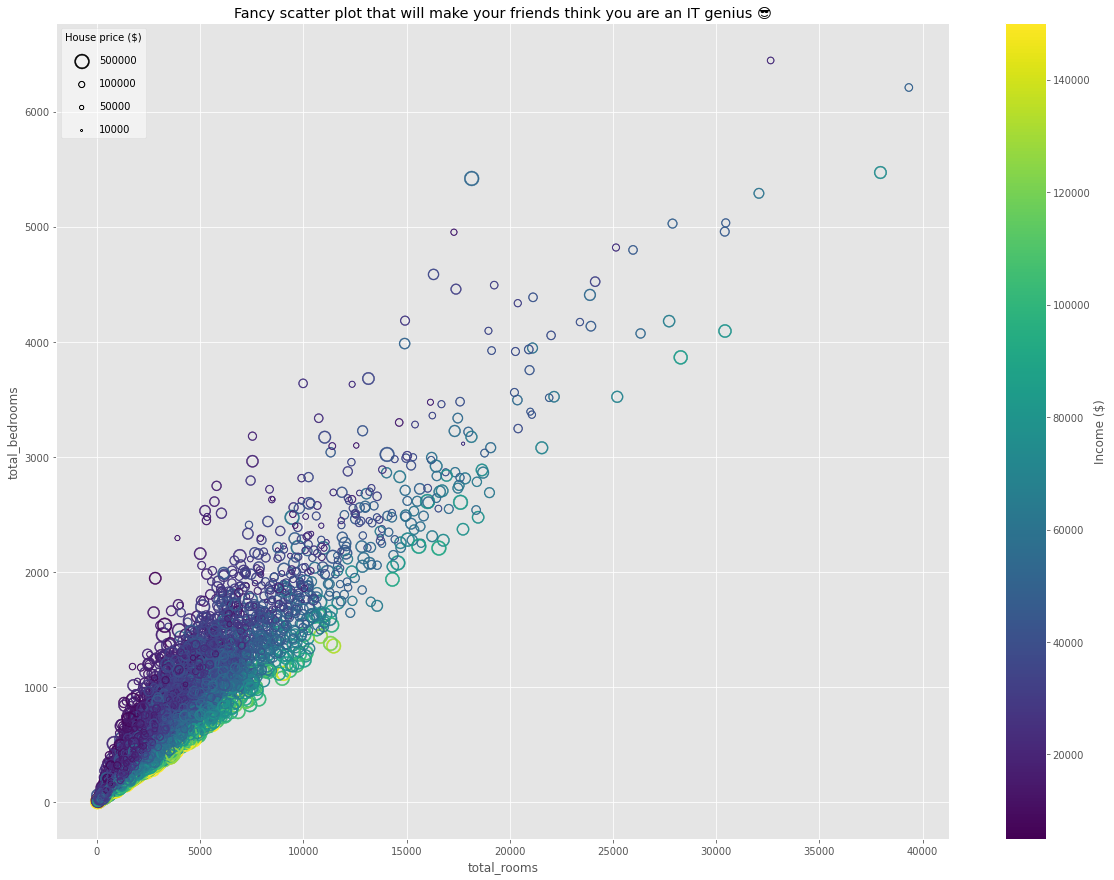

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(
    x=df_housing["total_rooms"], y=df_housing["total_bedrooms"], 
    s=df_housing["median_house_value"]/2000, 
    c=df_housing["median_income"]*10000, cmap="viridis",
    alpha=1, 
    marker=r'$\bigcirc$', #LaTeX symbols: https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols
    )
plt.xlabel("total_rooms"); plt.ylabel("total_bedrooms");
plt.title("Fancy scatter plot that will make your friends think you are an IT genius 😎");
cbar = plt.colorbar()
cbar.ax.set_ylabel("Income ($)", rotation=90)
for area in [500000,100000,50000,10000]:
    plt.scatter([], [], c="k", marker=r'$\bigcirc$', alpha=1, s=area/2000, label=str(area)) #alpha is transparent vs opaque, s is the size of points
plt.legend(scatterpoints=1, frameon=True, labelspacing=1.3, title="House price ($)", facecolor="white", framealpha=0.5);

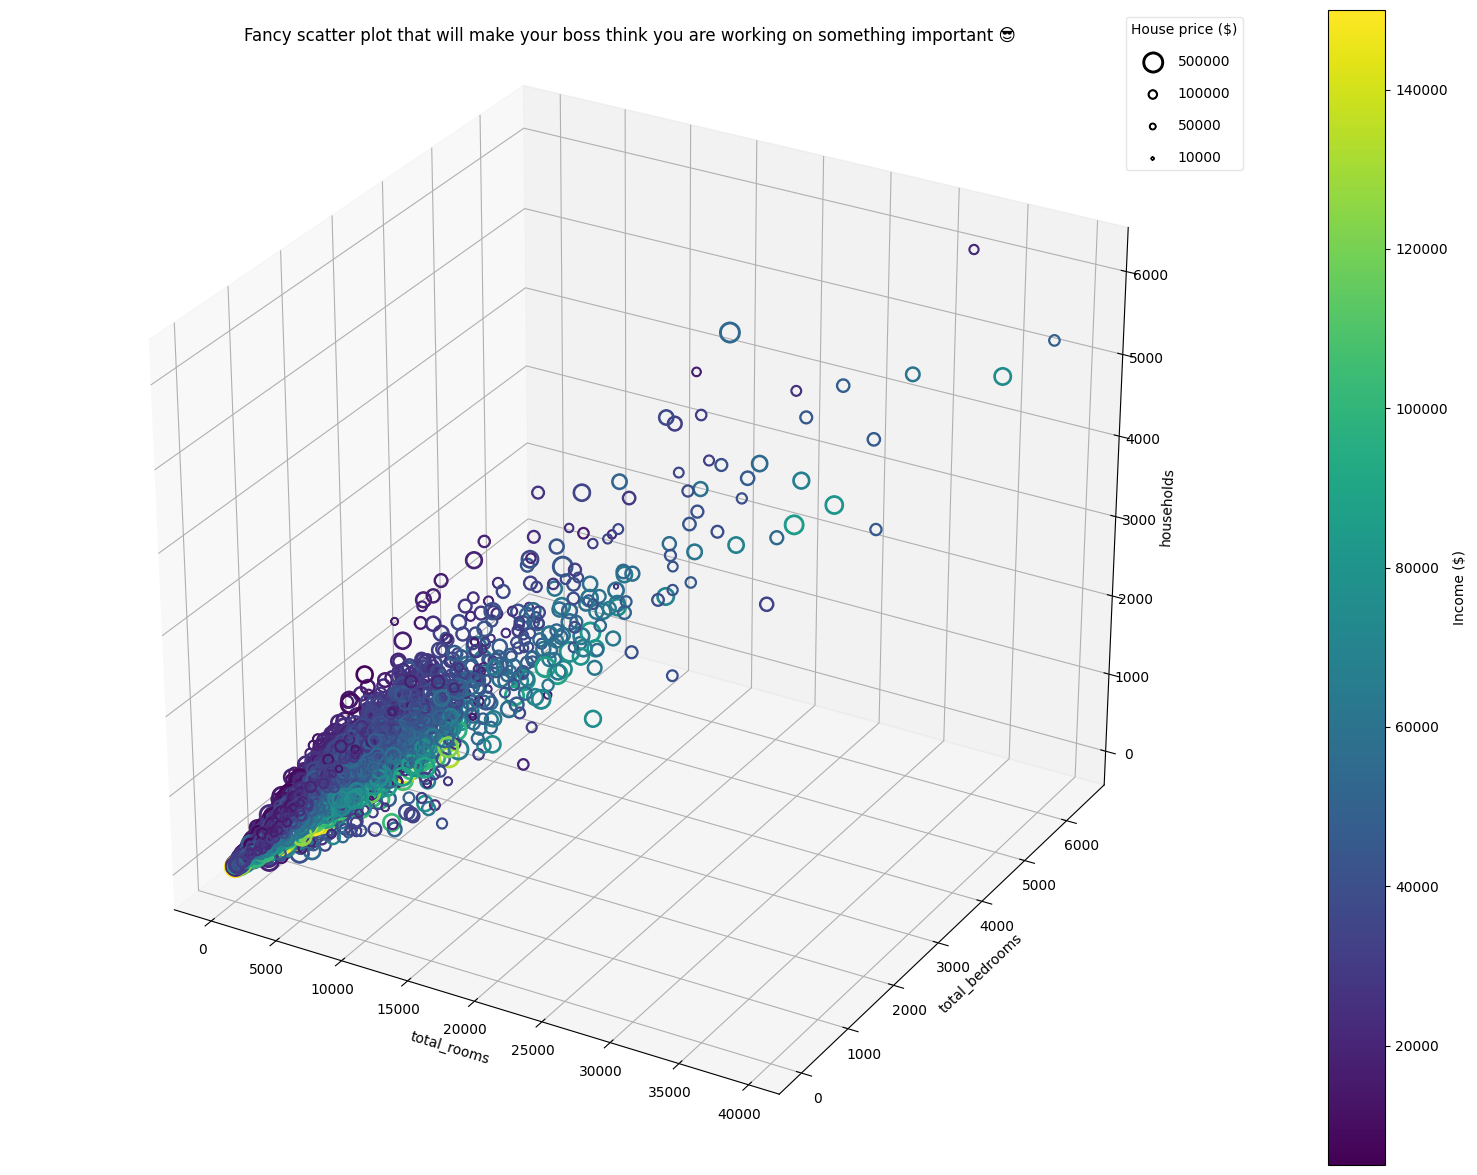

In [ ]:
from mpl_toolkits.mplot3d import Axes3D #needed for plotting 3D in some cases
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = fig.add_subplot(111, projection="3d") #111 means only 1 subplot (1 row, 1 column and index=1)
  p = ax.scatter(
      xs=df_housing["total_rooms"], 
      ys=df_housing["total_bedrooms"], 
      zs=df_housing["households"],
      s=df_housing["median_house_value"]/2000, 
      c=df_housing["median_income"]*10000, cmap="viridis",
      alpha=1, 
      marker=r'$\bigcirc$', #LaTeX symbols: https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols
      )
  ax.set_xlabel("total_rooms")
  ax.set_ylabel("total_bedrooms")
  ax.set_zlabel("households")
  plt.title("Fancy scatter plot that will make your boss think you are working on something important 😎", y=1.05);
  cbar = fig.colorbar(p)
  cbar.ax.set_ylabel("Income ($)", rotation=90)
  for area in [500000,100000,50000,10000]:
      plt.scatter([], [], c="k", marker=r'$\bigcirc$', alpha=1, s=area/2000, label=str(area))
  plt.legend(scatterpoints=1, frameon=True, labelspacing=1.3, title="House price ($)", facecolor="white", framealpha=0.5);
  plt.savefig("matplotlib 3D scatter.png")

## Line plot

array([-0.01     , -0.0099998, -0.0099996, ...,  0.0099996,  0.0099998,
        0.01     ])

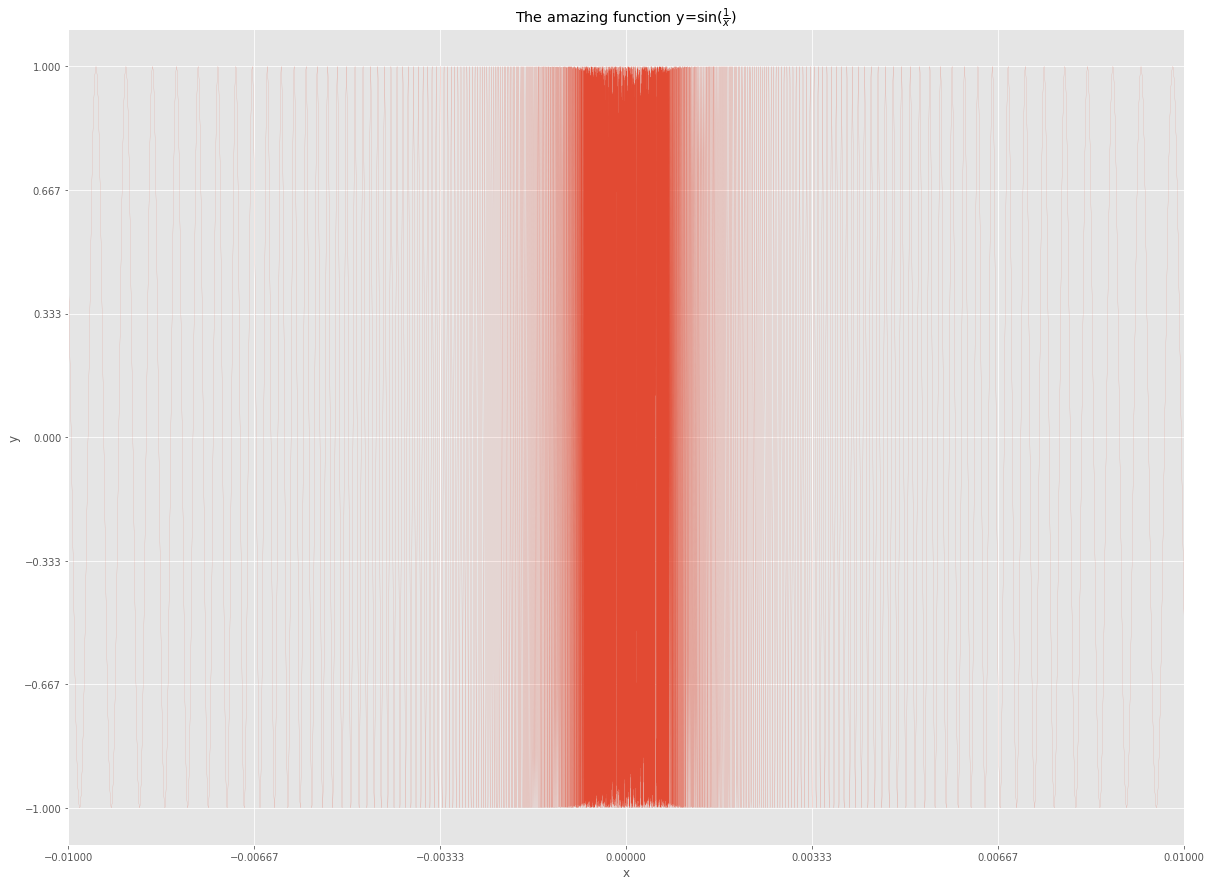

In [ ]:
step,range=100000,1E-2
x = np.linspace(-range, range, step)
display(x)
plt.figure(figsize=(20,15))
plt.plot(x, np.sin(1/x), linewidth=0.1) #y=sin(1/x)
plt.xlim(-range, range)
plt.xlabel('x');plt.ylabel('y')
plt.xticks(np.linspace(-range,range,7));plt.yticks(np.linspace(-1,1,7))
plt.title("The amazing function y=sin($\\frac{1}{x}$)") #LaTeX formatting: https://matplotlib.org/3.1.1/tutorials/text/usetex.html
plt.savefig("matplotlib line.png")

## Bar plot

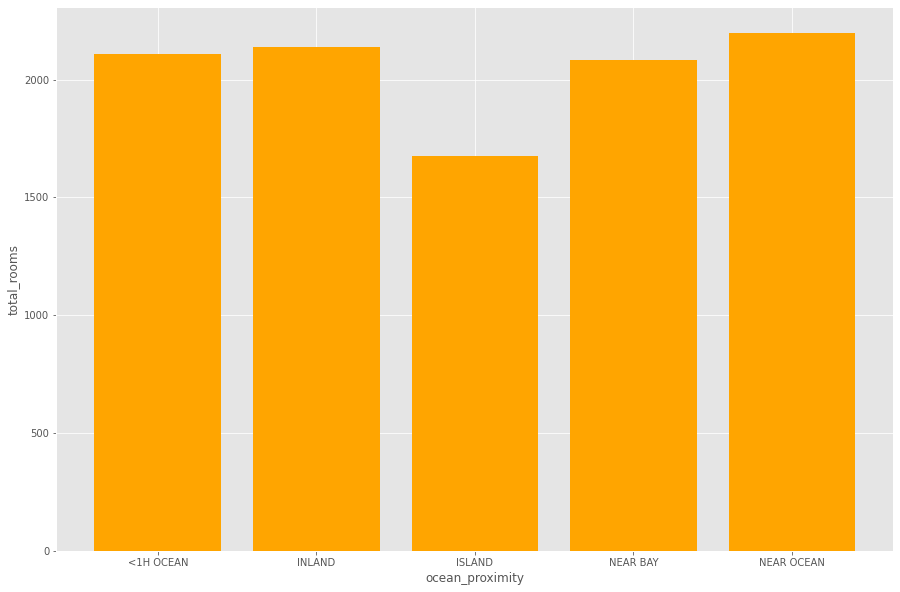

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(df_groupby_room["ocean_proximity"], df_groupby_room["total_rooms"], color="orange");
plt.xlabel('ocean_proximity'); plt.ylabel('total_rooms');

## Multiple subplots and customization

In [ ]:
df_groupby_class = df_housing.groupby("median_income_category")[["median_income", "median_house_value"]].median().reset_index()
df_groupby_class["median_income"]*=10000
df_groupby_class

,median_income_category,median_income,median_house_value
0,poor people,8658.0,100000.0
1,working class,27778.0,141100.0
2,lower-middle class,49312.0,240400.0
3,middle class,78521.0,416500.0
4,upper-middle class,107937.0,500001.0
5,rich people,150001.0,500001.0


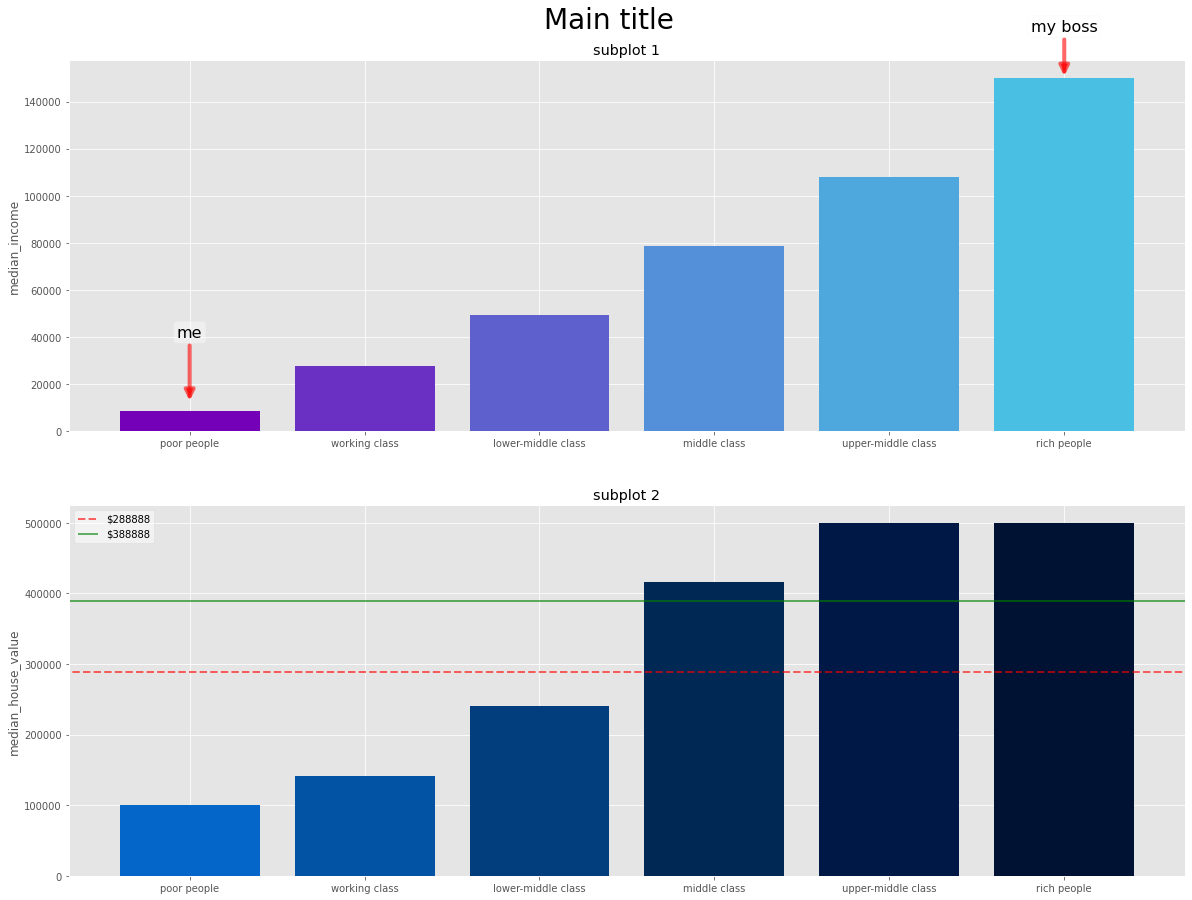

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
#create color scheme manually - the # symbol is put infront of each color code
colours_1 = ["#"+s for s in ["7400b8","6930c3","5e60ce","5390d9","4ea8de","48bfe3","56cfe1","64dfdf","72efdd","80ffdb"]] #https://coolors.co/generate

#axes refers to each of the subplots...axes[0] is the first, and axes[1] is the second
axes[0].bar(x=df_groupby_class["median_income_category"], height=df_groupby_class["median_income"], color=colours_1)
axes[0].set_ylabel("median_income")
axes[0].set_title('subplot 1')
axes[0].annotate("me", xy=(0, 12000), 
                 xytext=(-0, 40000), horizontalalignment="center", size=16,
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.4), 
                 arrowprops=dict(arrowstyle='-|>', mutation_scale=20, linewidth=4, color="r", alpha=0.6))
axes[0].annotate("my boss", xy=(5, 150000), 
                 xytext=(5, 170000), horizontalalignment="center", size=16,
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.4), 
                 arrowprops=dict(arrowstyle='-|>', mutation_scale=20, linewidth=4, color="r", alpha=0.6))


colours_2 = ["#"+s for s in ["0466c8","0353a4","023e7d","002855","001845","001233","33415c","5c677d","7d8597","979dac"]]
axes[1].bar(x=df_groupby_class["median_income_category"], height=df_groupby_class["median_house_value"], color=colours_2)
axes[1].set_ylabel("median_house_value")
axes[1].set_title('subplot 2')
axes[1].set_xlim(axes[1].get_xlim())
axes[1].hlines(288888, -10, 10, colors='r', alpha=0.6, linestyles='--', lw=2, label="$288888") #horizontal line
axes[1].hlines(388888, -10, 10, colors='g', alpha=0.6, linestyles='-', lw=2, label="$388888")
axes[1].legend(facecolor="white", framealpha=0.5)

fig.suptitle("Main title", fontsize=28, y=0.93)
fig.savefig("matplotlib subplots.png")

# Plotting with seaborn

## Pair plot
https://seaborn.pydata.org/generated/seaborn.pairplot.html

CPU times: user 19.8 s, sys: 195 ms, total: 20 s
Wall time: 19.9 s


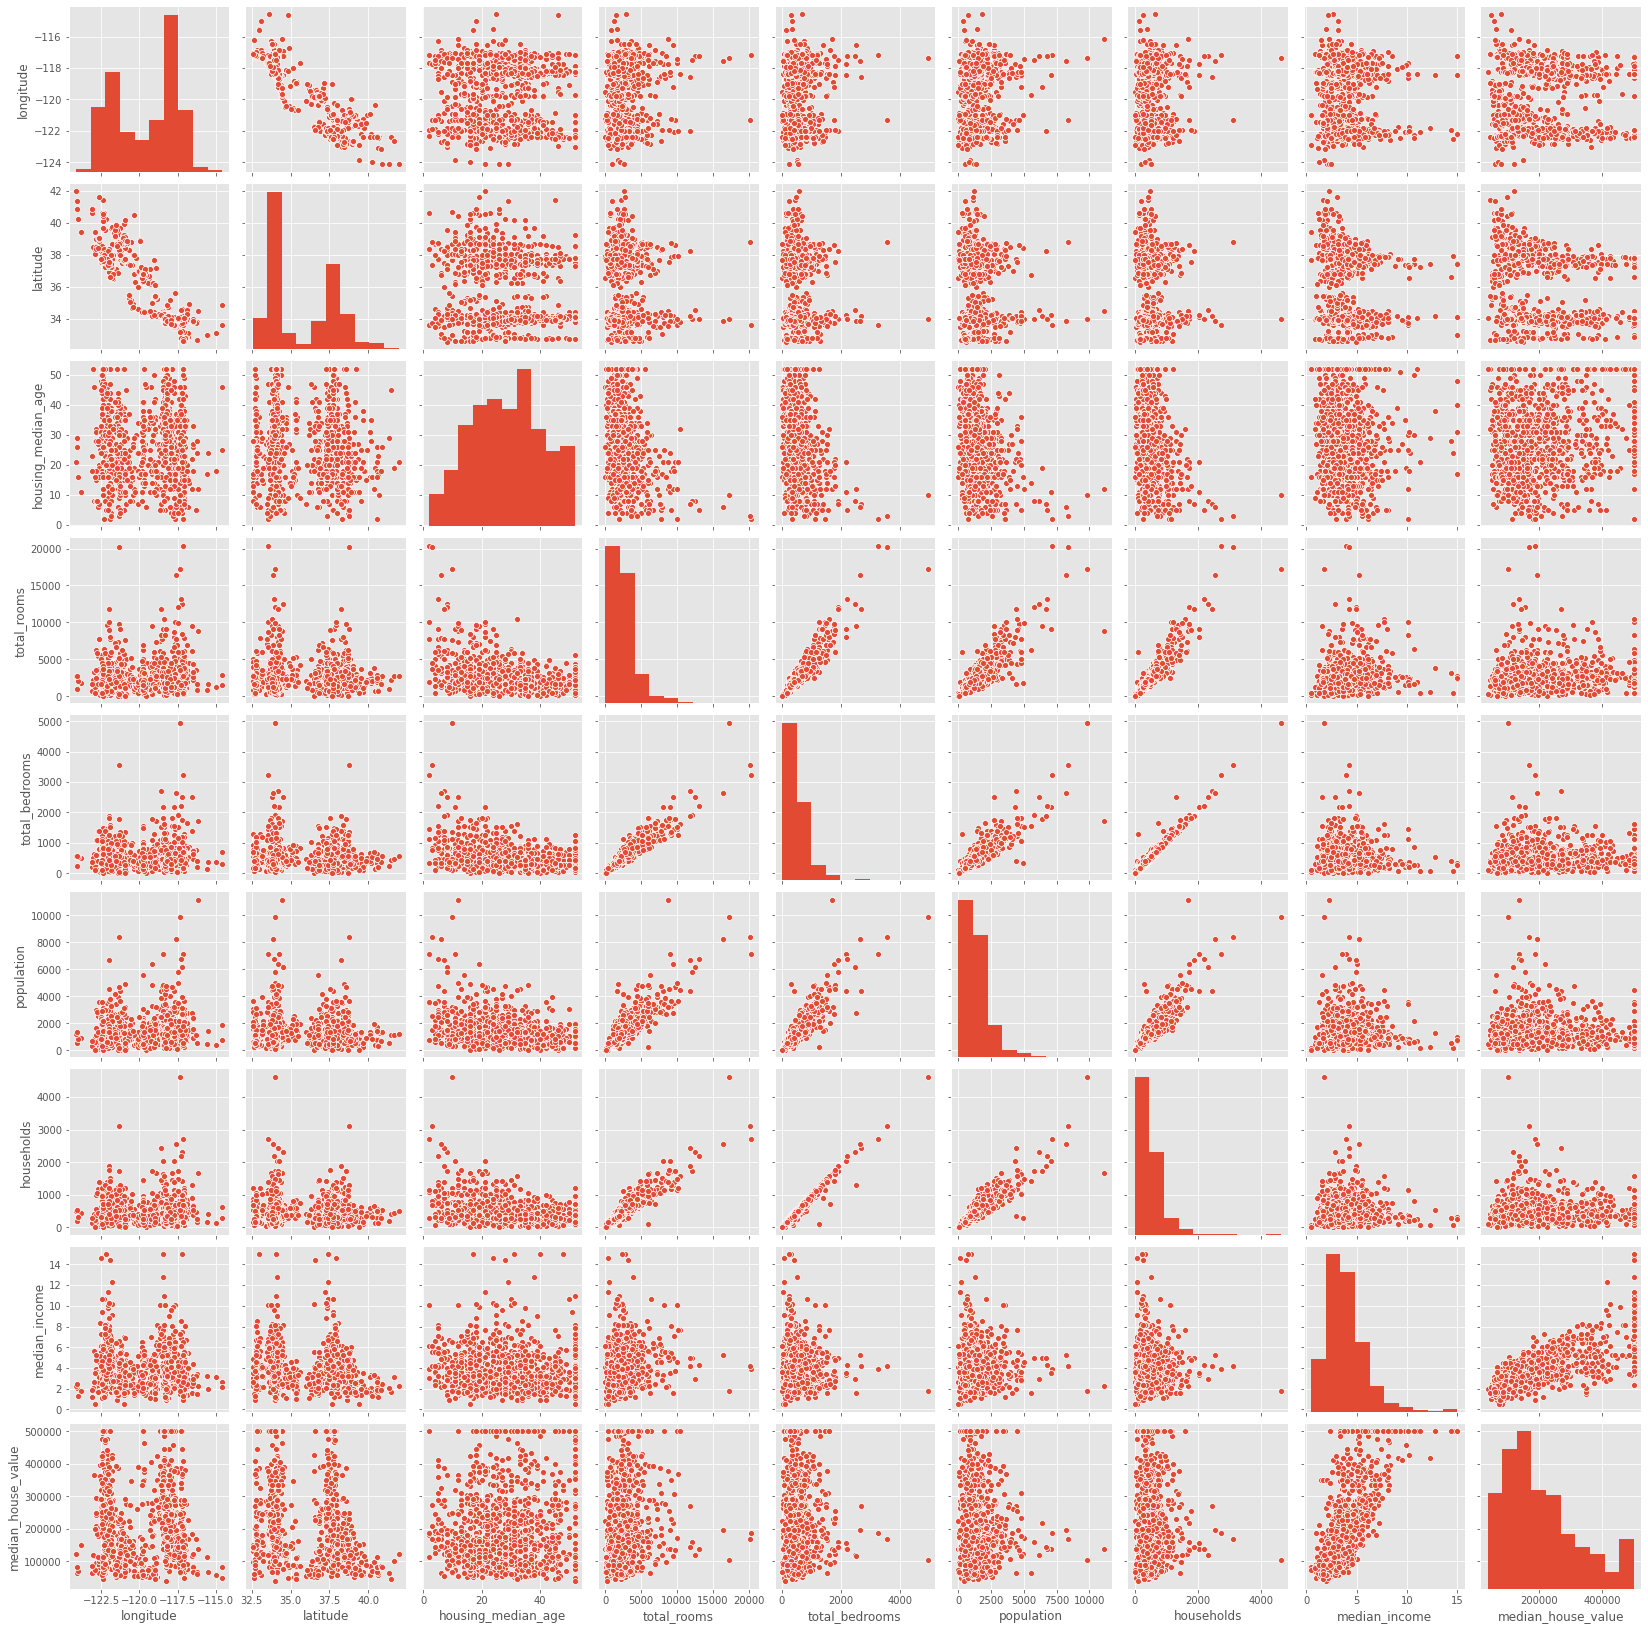

In [ ]:
%%time
g = sns.pairplot(df_housing.sample(1000))
g.savefig("seaborn pairplot.png")

## Scatter plot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

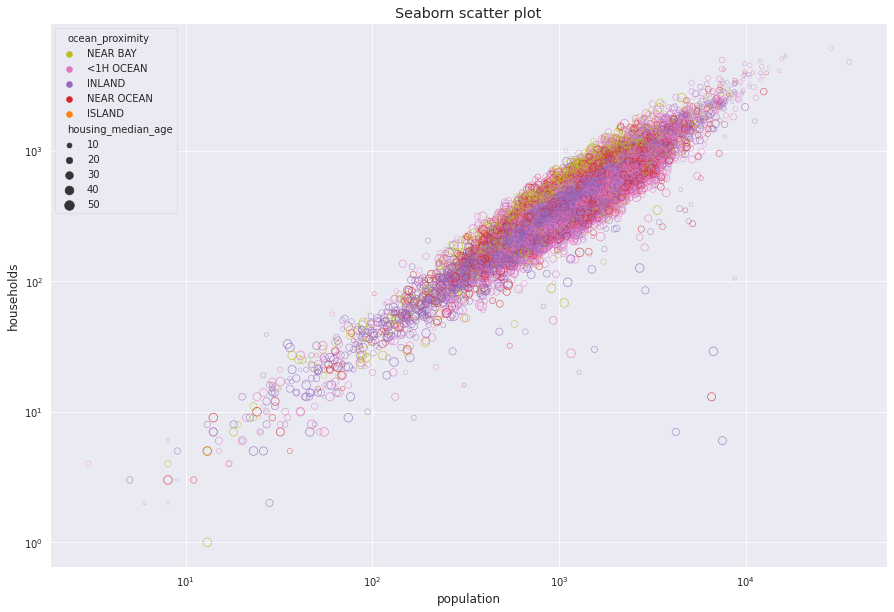

In [ ]:
with sns.axes_style("darkgrid"):
  fig, ax = plt.subplots(figsize=(15, 10))
  g = sns.scatterplot(
      data=df_housing, 
      x="population", y="households",
      hue="ocean_proximity", size="housing_median_age",
      sizes=(10, 100), linewidth=0, marker=r'$\bigcirc$', alpha=0.8, palette="tab10_r",
      ax=ax,
      )
  ax.set(xscale="log", yscale="log")
  ax.set_title("Seaborn scatter plot")
  fig.savefig("seaborn scatterplot.png")

## Joint plot
https://seaborn.pydata.org/generated/seaborn.jointplot.html

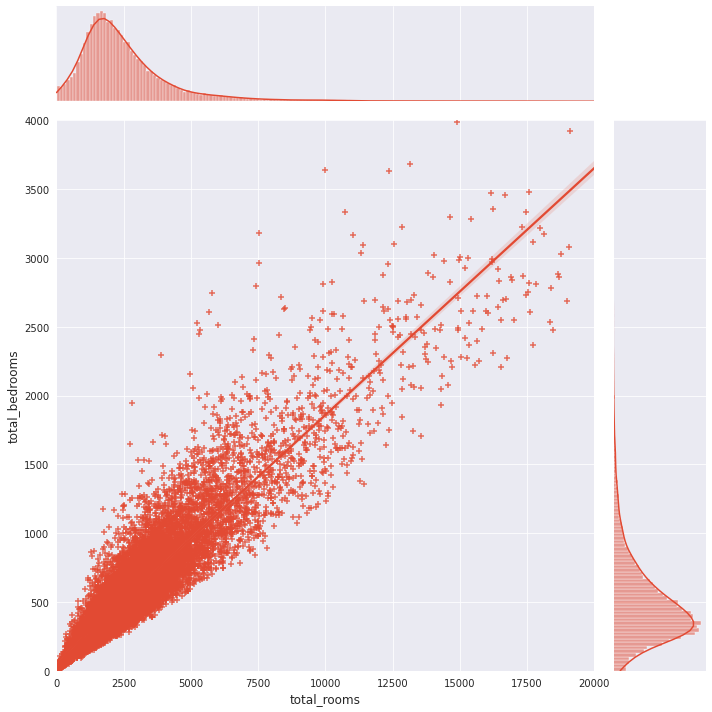

In [ ]:
with sns.axes_style("darkgrid"):
  g = sns.jointplot(
      data=df_housing, 
      x="total_rooms", y="total_bedrooms",
      xlim=(0, 20000), ylim=(0, 4000),
      kind="reg", truncate=True, #reg is line of best fit
      marker="+", #color="orange",
      height=10,
      )
  g.savefig("seaborn jointplot.png")

## Box plot
https://seaborn.pydata.org/generated/seaborn.boxplot.html

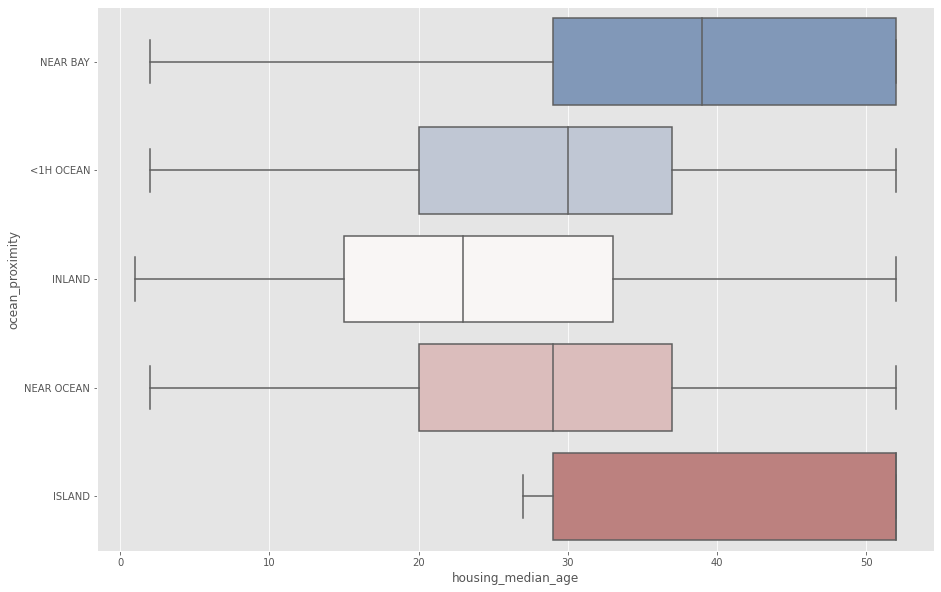

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.boxplot(x="housing_median_age", y="ocean_proximity", data=df_housing,
                whis=1.5, palette="vlag")

Subplots

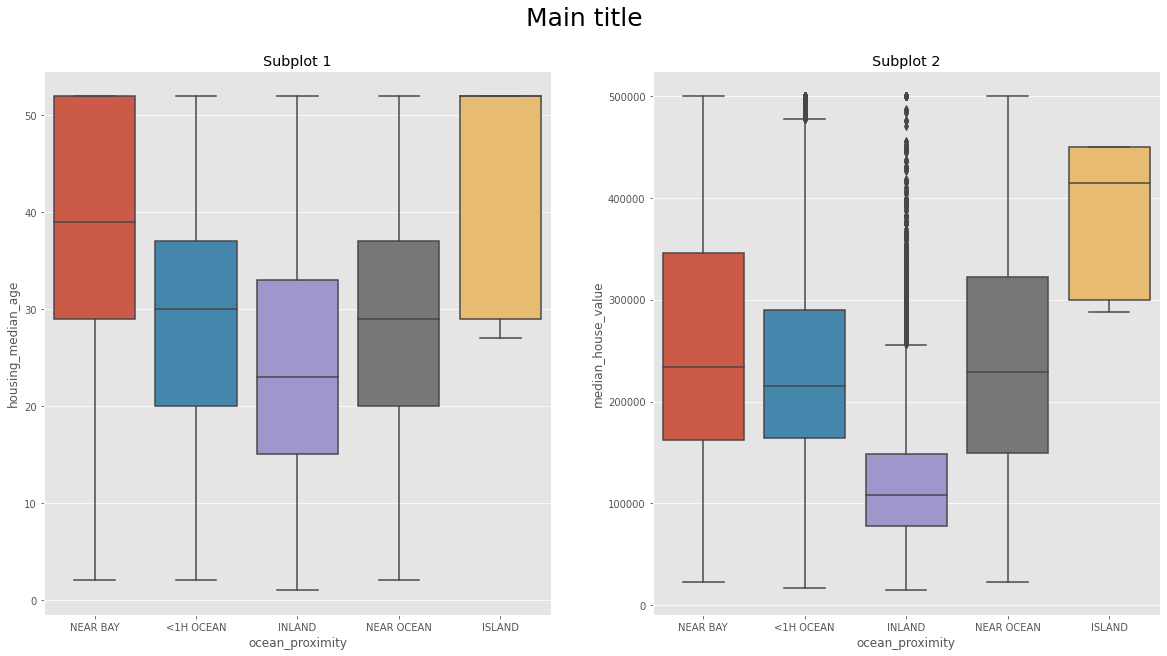

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x="ocean_proximity", y="housing_median_age", data=df_housing, ax=axes[0])
axes[0].set_title("Subplot 1");
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df_housing, ax=axes[1])
axes[1].set_title("Subplot 2");
fig.suptitle("Main title", y=0.97, fontsize=25);


## Violin plot
https://seaborn.pydata.org/generated/seaborn.violinplot.html

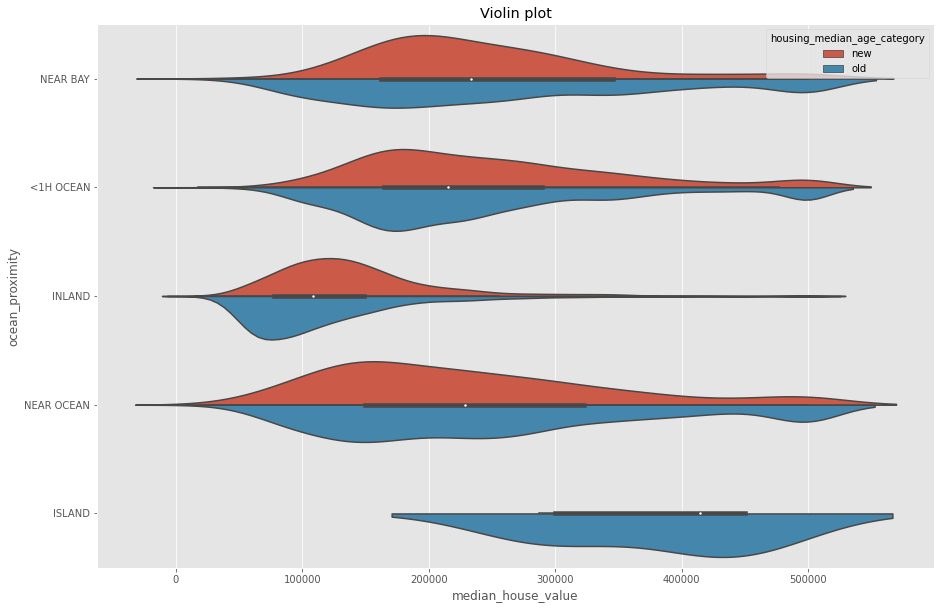

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.violinplot(x="median_house_value", y="ocean_proximity", data=df_housing, 
                   hue="housing_median_age_category", split=True, 
                   )
g.set_title("Violin plot");

## Heat map
https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
%%time
df_cm = df_housing.corr(method="spearman")
display(df_cm)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.878908,-0.151840,0.041203,0.063879,0.124223,0.060889,-0.010225,-0.069679
latitude,-0.878908,1.000000,0.032984,-0.019288,-0.056636,-0.124314,-0.075062,-0.088092,-0.166120
housing_median_age,-0.151840,0.032984,1.000000,-0.356115,-0.306544,-0.282934,-0.280869,-0.146260,0.075420
total_rooms,0.041203,-0.019288,-0.356115,1.000000,0.915021,0.815682,0.906487,0.270594,0.205060
total_bedrooms,0.063879,-0.056636,-0.306544,0.915021,1.000000,0.870937,0.975627,-0.006196,0.086259
population,0.124223,-0.124314,-0.282934,0.815682,0.870937,1.000000,0.903633,0.005387,0.002873
households,0.060889,-0.075062,-0.280869,0.906487,0.975627,0.903633,1.000000,0.029235,0.111630
median_income,-0.010225,-0.088092,-0.146260,0.270594,-0.006196,0.005387,0.029235,1.000000,0.677108
median_house_value,-0.069679,-0.166120,0.075420,0.205060,0.086259,0.002873,0.111630,0.677108,1.000000


CPU times: user 50.5 ms, sys: 0 ns, total: 50.5 ms
Wall time: 52.4 ms


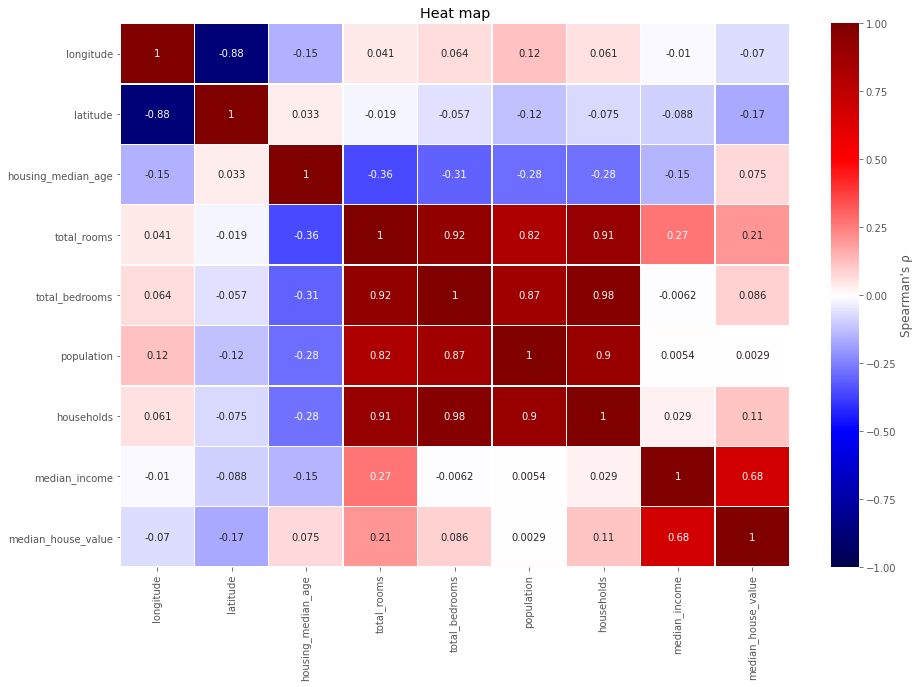

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");

# When in doubt, stackoverflow!
![alt text](https://i.imgur.com/oxvOVQq.jpg)